# Parameters Tuning 

Find the optimal paramerter for each algorithm 


In [11]:
import dill
dill.dump_session('notebook_env.db')


In [1]:
import os 
os.chdir('..')
os.getcwd()

'/Users/mac/Documents/Thesis/Thesis2023-TrongCuong/Code'

In [2]:
from Evaluator import evaluate
from Bandits import *
from matplotlib import pyplot as plt
import numpy as np
import random
random.seed(42)
np.random.seed(42)

In [3]:
%%time
import Dataset
files = ("/Users/mac/Documents/Thesis/Thesis2023-TrongCuong/Data/ydata-fp-td-clicks-v1_0.20090501")
Dataset.get_yahoo_events(files)


4544524 events with 49 articles
Skipped articles: 137468
CPU times: user 3min 50s, sys: 7.25 s, total: 3min 58s
Wall time: 3min 59s


In [4]:
#define parameter range
epsilon_values = np.arange(0, 1.1, 0.1)
alpha_values = np.arange(0, 1.5, 0.2)

In [5]:
#Get CRT base for calculate CTF Lift.
sizes = [1, 5, 10, 20, 30, 100]
rnd_ctr= []
for size in sizes:
    print(f"\n===== Size: {size}% =====")
    learn_ctr, _ = evaluate(RandomPolicy(), size=size,learn_ratio=1)
    rnd_ctr.append(learn_ctr[-1])


===== Size: 1% =====
Random policy       0.0449    0.2s

===== Size: 5% =====
Random policy       0.0404    1.2s

===== Size: 10% =====
Random policy       0.0423    2.5s

===== Size: 20% =====
Random policy       0.041     4.9s

===== Size: 30% =====
Random policy       0.0411    7.5s

===== Size: 100% =====
Random policy       0.04      18.9s


In [6]:
def plot_results(tests, size, index):
    learn_ctrs = [] # list of CTR lift on learn bucket
    #deploy_ctrs = [] # list of CTR lift on deploy bucket
    print(f"\t ===== Size: {size}% ===== \n")
    for test in tests:
        learn, _ = evaluate(test,learn_ratio=1, size= size)
        learn = learn[1000:]
        if hasattr(test, 'e'):
            plt.plot(learn, label="ε={}".format(test.e))
        else:
            plt.plot(learn, label="α={}".format(test.alpha))

        learn_ctrs.append(learn[-1]/rnd_ctr[index])
        # deploy_ctrs.append(deploy[-1]/rnd_ctr)

    plt.title("Learning Bucket")
    plt.xlabel("T")
    plt.ylabel("CTR")
    plt.legend(loc= 'center left', bbox_to_anchor= (1,0.5))
    plt.show()

    #Relative CTR 
    if hasattr(test, 'e'):
        param_values = [x.e for x in tests]
        plt.xlabel('ε')
    else:
        param_values = [x.alpha for x in tests]
        param_values = list(map(str,param_values))
        plt.xlabel('α')
    plt.plot(param_values, learn_ctrs, marker= 'o')
    plt.title("Learning Bucket")
    plt.ylabel("Relative CTR")
    plt.show()
    # find best hyper parameter
    best_idx = np.argmax(learn_ctrs)
    print(f'Best parameter in size: {size}%', tests[best_idx].algorithm)

## Results for E-Greedy

	 ===== Size: 1% ===== 

Egreedy (ε=0.0)     0.0528    0.3s
Egreedy (ε=0.1)     0.0504    0.3s
Egreedy (ε=0.2)     0.046     0.3s
Egreedy (ε=0.3)     0.0557    0.3s
Egreedy (ε=0.4)     0.0479    0.3s
Egreedy (ε=0.5)     0.0446    0.3s
Egreedy (ε=0.6)     0.0407    0.2s
Egreedy (ε=0.7)     0.0522    0.2s
Egreedy (ε=0.8)     0.0458    0.2s
Egreedy (ε=0.9)     0.0376    0.2s
Egreedy (ε=1.0)     0.0349    0.2s


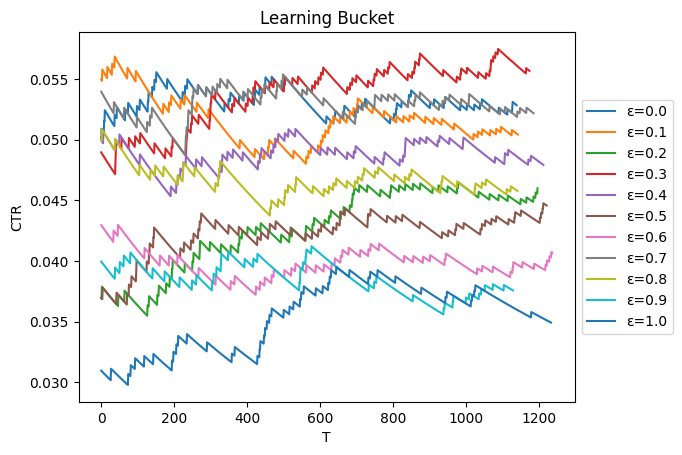

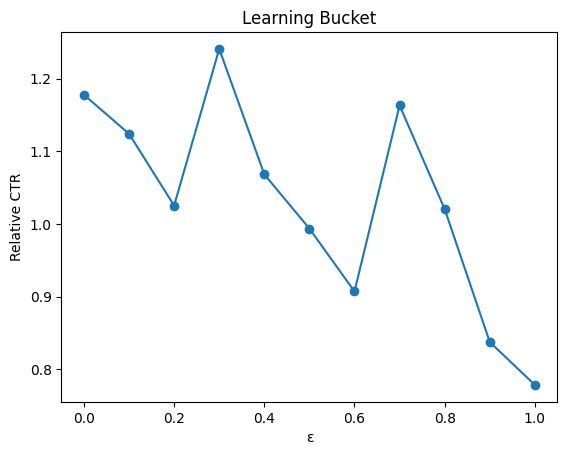

Best parameter in size: {size}% Egreedy (ε=0.3)
	 ===== Size: 5% ===== 

Egreedy (ε=0.0)     0.0535    1.2s
Egreedy (ε=0.1)     0.0606    1.2s
Egreedy (ε=0.2)     0.0494    1.2s
Egreedy (ε=0.3)     0.049     1.2s
Egreedy (ε=0.4)     0.0448    1.3s
Egreedy (ε=0.5)     0.0503    1.3s
Egreedy (ε=0.6)     0.0464    1.3s
Egreedy (ε=0.7)     0.0443    1.2s
Egreedy (ε=0.8)     0.0406    1.1s
Egreedy (ε=0.9)     0.0474    1.1s
Egreedy (ε=1.0)     0.0429    1.0s


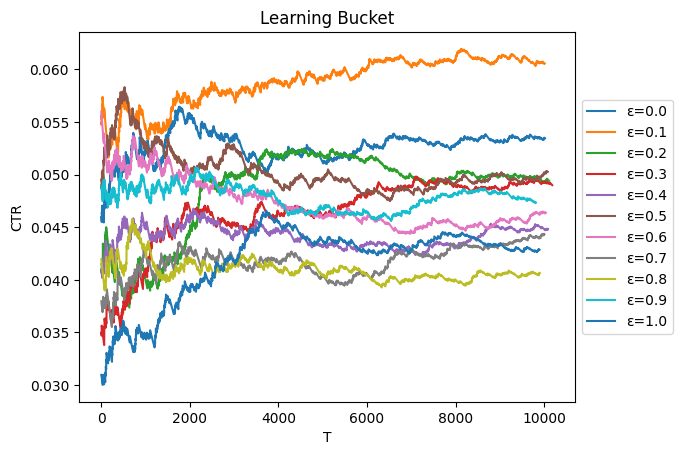

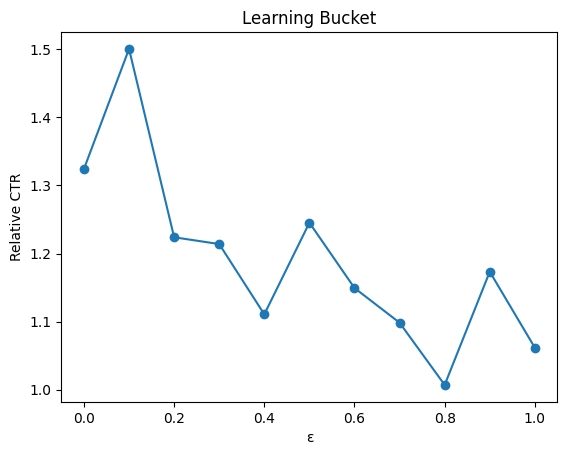

Best parameter in size: {size}% Egreedy (ε=0.1)
	 ===== Size: 10% ===== 

Egreedy (ε=0.0)     0.0469    2.4s
Egreedy (ε=0.1)     0.0573    2.5s
Egreedy (ε=0.2)     0.0562    2.4s
Egreedy (ε=0.3)     0.0527    2.3s
Egreedy (ε=0.4)     0.0529    2.4s
Egreedy (ε=0.5)     0.0491    2.3s
Egreedy (ε=0.6)     0.0452    2.3s
Egreedy (ε=0.7)     0.0462    2.2s
Egreedy (ε=0.8)     0.0408    2.1s
Egreedy (ε=0.9)     0.0417    2.1s
Egreedy (ε=1.0)     0.0392    1.9s


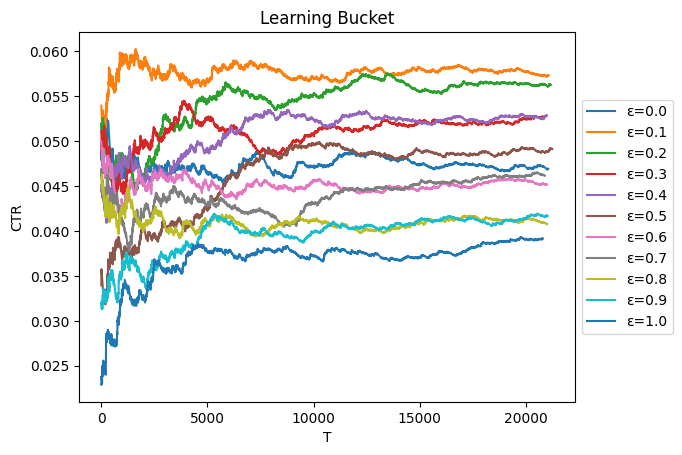

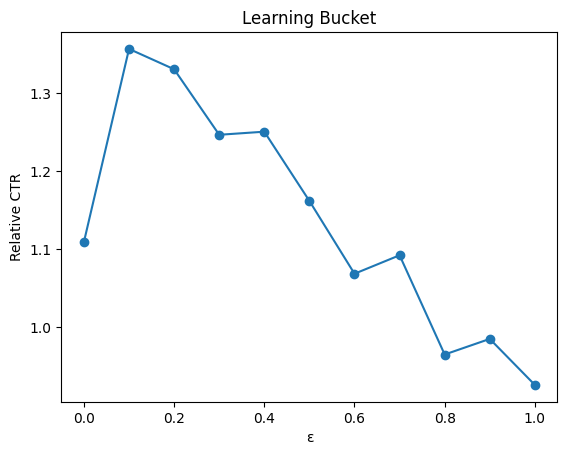

Best parameter in size: {size}% Egreedy (ε=0.1)
	 ===== Size: 20% ===== 

Egreedy (ε=0.0)     0.0379    4.9s
Egreedy (ε=0.1)     0.0573    4.8s
Egreedy (ε=0.2)     0.0532    4.7s
Egreedy (ε=0.3)     0.0551    5.9s
Egreedy (ε=0.4)     0.0518    4.7s
Egreedy (ε=0.5)     0.0515    4.6s
Egreedy (ε=0.6)     0.0458    4.5s
Egreedy (ε=0.7)     0.0463    4.4s
Egreedy (ε=0.8)     0.0444    4.2s
Egreedy (ε=0.9)     0.0418    4.1s
Egreedy (ε=1.0)     0.0395    3.8s


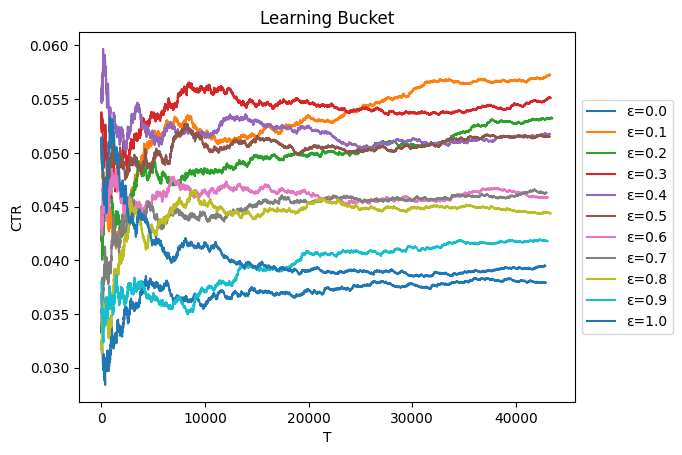

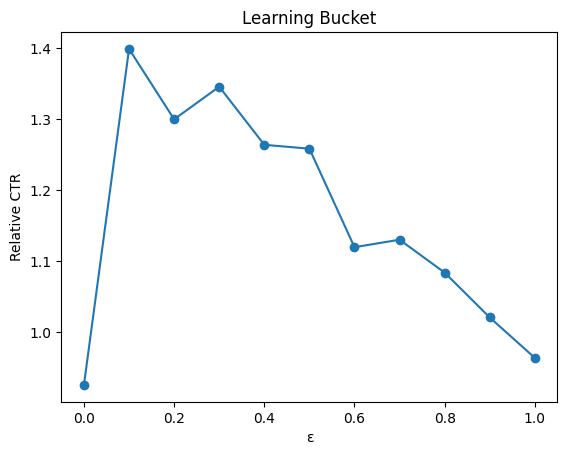

Best parameter in size: {size}% Egreedy (ε=0.1)
	 ===== Size: 30% ===== 

Egreedy (ε=0.0)     0.0476    7.4s
Egreedy (ε=0.1)     0.0609    7.3s
Egreedy (ε=0.2)     0.0501    7.3s
Egreedy (ε=0.3)     0.0573    7.2s
Egreedy (ε=0.4)     0.0522    7.2s
Egreedy (ε=0.5)     0.0526    7.1s
Egreedy (ε=0.6)     0.0481    7.0s
Egreedy (ε=0.7)     0.0463    6.6s
Egreedy (ε=0.8)     0.0441    6.5s
Egreedy (ε=0.9)     0.0427    6.2s
Egreedy (ε=1.0)     0.0413    5.9s


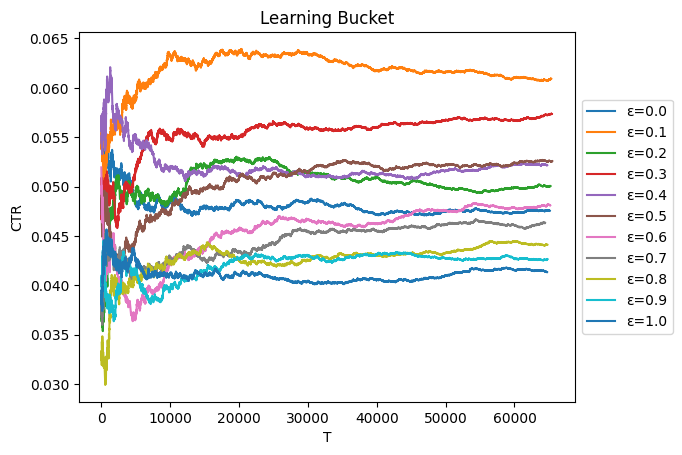

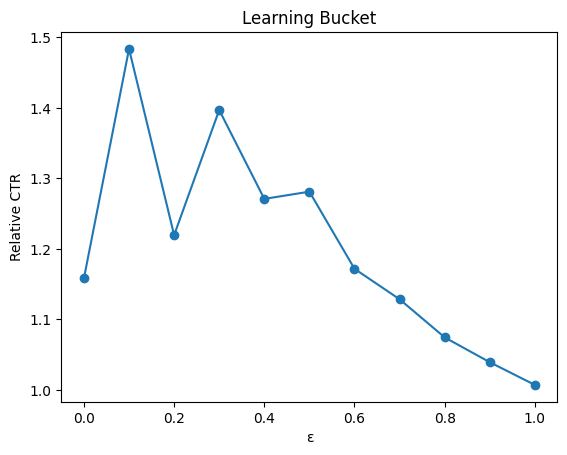

Best parameter in size: {size}% Egreedy (ε=0.1)
	 ===== Size: 100% ===== 

Egreedy (ε=0.0)     0.0431    19.2s
Egreedy (ε=0.1)     0.0614    19.0s
Egreedy (ε=0.2)     0.0538    19.6s
Egreedy (ε=0.3)     0.055     20.6s
Egreedy (ε=0.4)     0.0543    21.1s
Egreedy (ε=0.5)     0.0508    18.9s
Egreedy (ε=0.6)     0.0493    18.8s
Egreedy (ε=0.7)     0.0468    17.8s
Egreedy (ε=0.8)     0.0452    17.6s
Egreedy (ε=0.9)     0.0432    16.9s
Egreedy (ε=1.0)     0.0409    15.0s


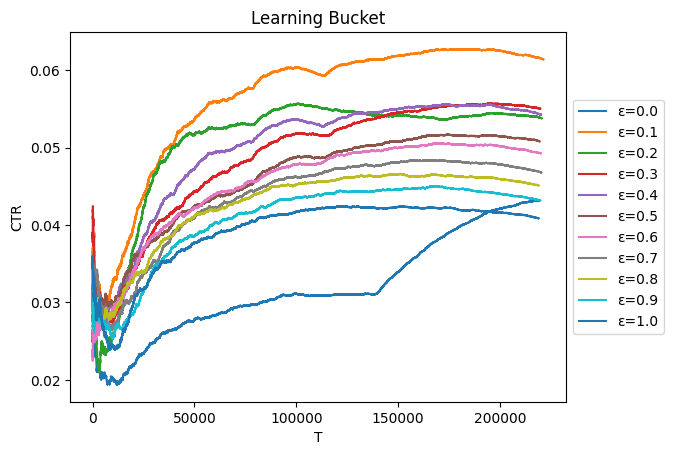

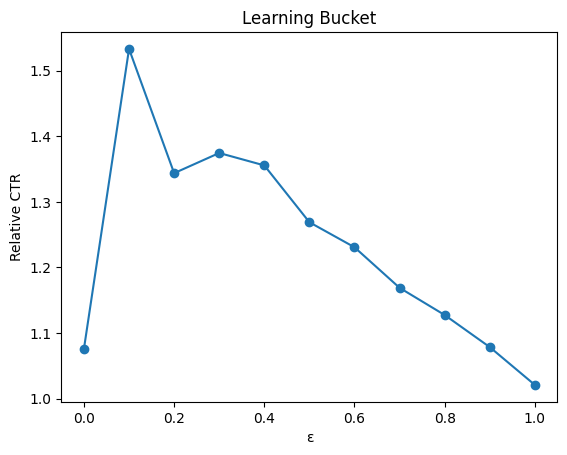

Best parameter in size: {size}% Egreedy (ε=0.1)


In [7]:
sizes = [1, 5, 10, 20, 30, 100]
for i, size in enumerate(sizes):
    tests = [Egreedy(e) for e in epsilon_values]
    plot_results(tests, size=size, index= i)

## Results for E-Greedy Disjoint

	 ===== Size: 1% ===== 

Egreedy Disjoint (ε=0.0), context:user)0.0508    1.4s
Egreedy Disjoint (ε=0.1), context:user)0.0613    1.4s
Egreedy Disjoint (ε=0.2), context:user)0.049     1.4s
Egreedy Disjoint (ε=0.3), context:user)0.0518    1.4s
Egreedy Disjoint (ε=0.4), context:user)0.0453    1.4s
Egreedy Disjoint (ε=0.5), context:user)0.0392    1.4s
Egreedy Disjoint (ε=0.6), context:user)0.0444    1.5s
Egreedy Disjoint (ε=0.7), context:user)0.0326    1.5s
Egreedy Disjoint (ε=0.8), context:user)0.0409    1.6s
Egreedy Disjoint (ε=0.9), context:user)0.0387    1.7s
Egreedy Disjoint (ε=1.0), context:user)0.0435    1.7s


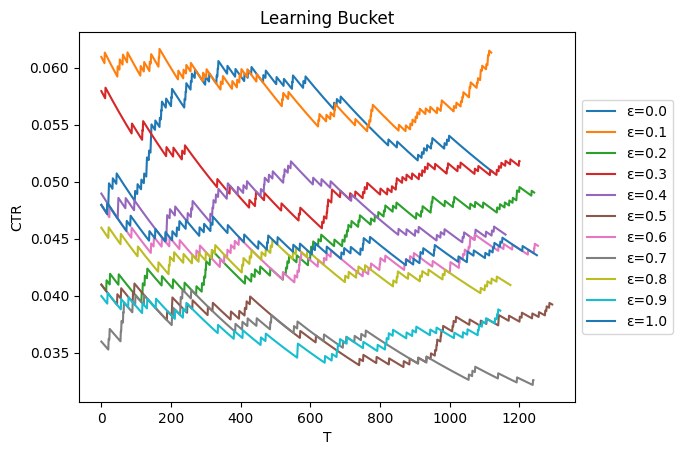

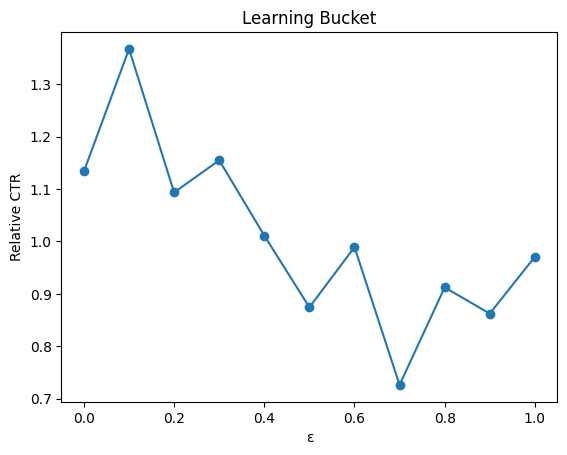

Best parameter in size: {size}% Egreedy Disjoint (ε=0.1), context:user)
	 ===== Size: 5% ===== 

Egreedy Disjoint (ε=0.0), context:user)0.0363    7.0s
Egreedy Disjoint (ε=0.1), context:user)0.0581    7.2s
Egreedy Disjoint (ε=0.2), context:user)0.0576    7.4s
Egreedy Disjoint (ε=0.3), context:user)0.0499    7.5s
Egreedy Disjoint (ε=0.4), context:user)0.0478    7.5s
Egreedy Disjoint (ε=0.5), context:user)0.049     7.5s
Egreedy Disjoint (ε=0.6), context:user)0.045     7.4s
Egreedy Disjoint (ε=0.7), context:user)0.0468    7.5s
Egreedy Disjoint (ε=0.8), context:user)0.0449    7.4s
Egreedy Disjoint (ε=0.9), context:user)0.0443    7.4s
Egreedy Disjoint (ε=1.0), context:user)0.0435    7.4s


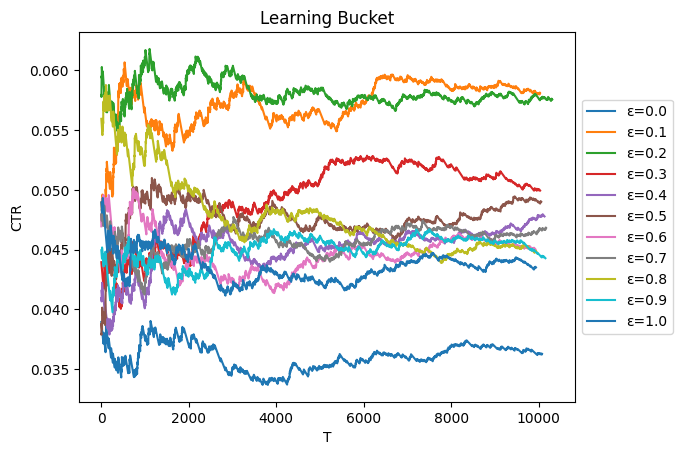

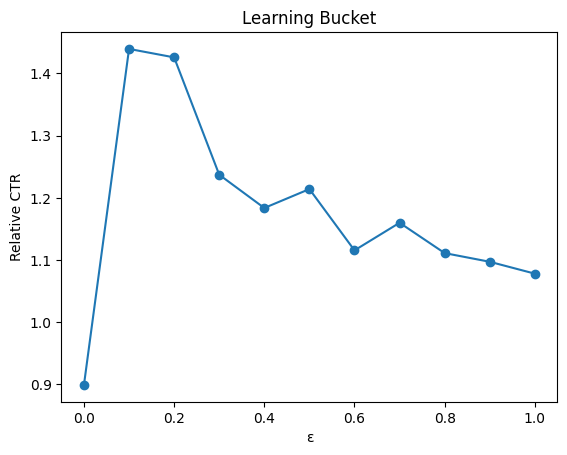

Best parameter in size: {size}% Egreedy Disjoint (ε=0.1), context:user)
	 ===== Size: 10% ===== 

Egreedy Disjoint (ε=0.0), context:user)0.052     13.7s
Egreedy Disjoint (ε=0.1), context:user)0.0607    13.9s
Egreedy Disjoint (ε=0.2), context:user)0.0562    14.1s
Egreedy Disjoint (ε=0.3), context:user)0.0534    14.3s
Egreedy Disjoint (ε=0.4), context:user)0.05      14.3s
Egreedy Disjoint (ε=0.5), context:user)0.0509    14.5s
Egreedy Disjoint (ε=0.6), context:user)0.0465    14.5s
Egreedy Disjoint (ε=0.7), context:user)0.045     14.7s
Egreedy Disjoint (ε=0.8), context:user)0.0455    14.7s
Egreedy Disjoint (ε=0.9), context:user)0.0433    14.7s
Egreedy Disjoint (ε=1.0), context:user)0.0413    14.7s


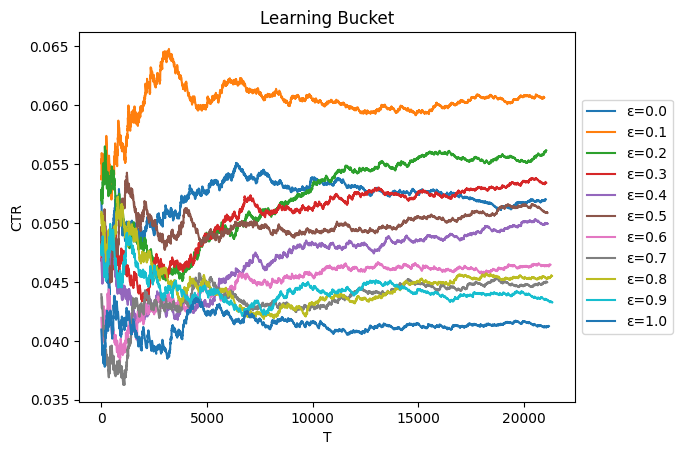

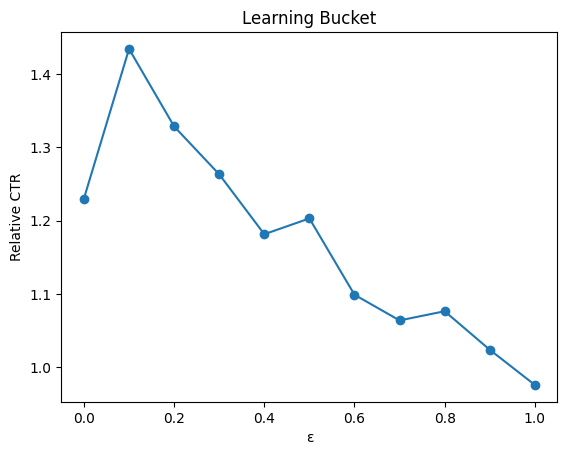

Best parameter in size: {size}% Egreedy Disjoint (ε=0.1), context:user)
	 ===== Size: 20% ===== 

Egreedy Disjoint (ε=0.0), context:user)0.0535    27.6s
Egreedy Disjoint (ε=0.1), context:user)0.0617    27.8s
Egreedy Disjoint (ε=0.2), context:user)0.0563    28.0s
Egreedy Disjoint (ε=0.3), context:user)0.0551    28.5s
Egreedy Disjoint (ε=0.4), context:user)0.0512    28.6s
Egreedy Disjoint (ε=0.5), context:user)0.0518    28.9s
Egreedy Disjoint (ε=0.6), context:user)0.0483    28.9s
Egreedy Disjoint (ε=0.7), context:user)0.0449    29.1s
Egreedy Disjoint (ε=0.8), context:user)0.0439    29.2s
Egreedy Disjoint (ε=0.9), context:user)0.0409    29.4s
Egreedy Disjoint (ε=1.0), context:user)0.0398    29.3s


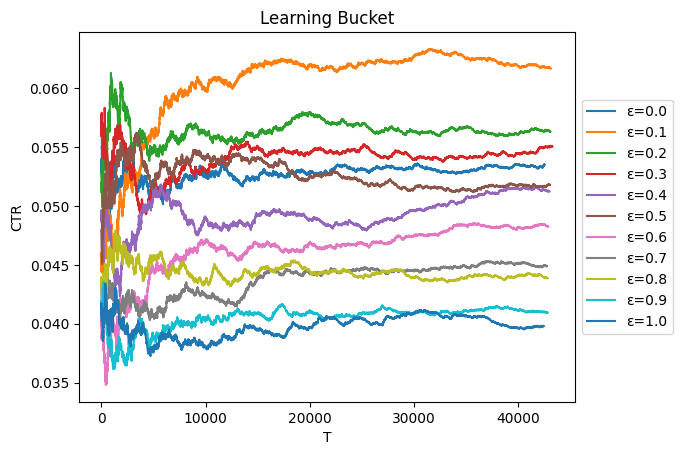

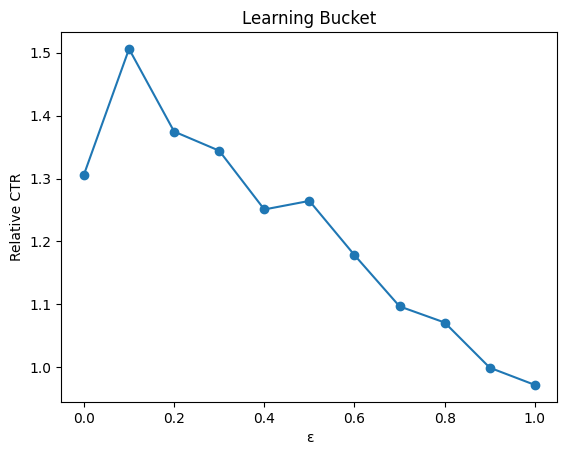

Best parameter in size: {size}% Egreedy Disjoint (ε=0.1), context:user)
	 ===== Size: 30% ===== 

Egreedy Disjoint (ε=0.0), context:user)0.0532    41.2s
Egreedy Disjoint (ε=0.1), context:user)0.0599    41.8s
Egreedy Disjoint (ε=0.2), context:user)0.0572    42.3s
Egreedy Disjoint (ε=0.3), context:user)0.051     42.5s
Egreedy Disjoint (ε=0.4), context:user)0.0513    43.2s
Egreedy Disjoint (ε=0.5), context:user)0.0494    53.8s
Egreedy Disjoint (ε=0.6), context:user)0.049     1.1m
Egreedy Disjoint (ε=0.7), context:user)0.0438    54.0s
Egreedy Disjoint (ε=0.8), context:user)0.0428    42.5s
Egreedy Disjoint (ε=0.9), context:user)0.0432    44.1s
Egreedy Disjoint (ε=1.0), context:user)0.0405    43.8s


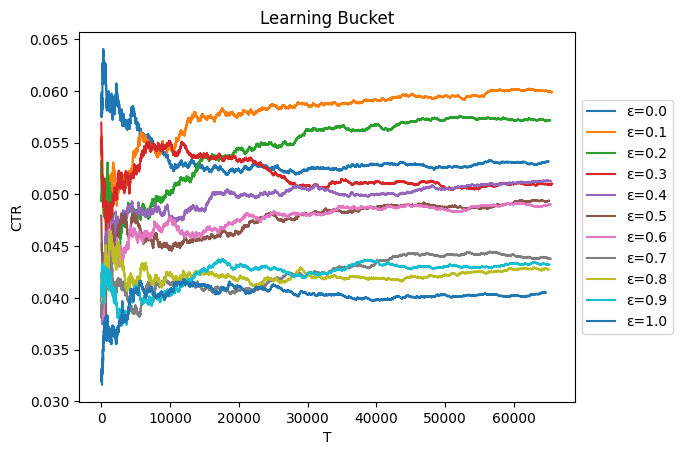

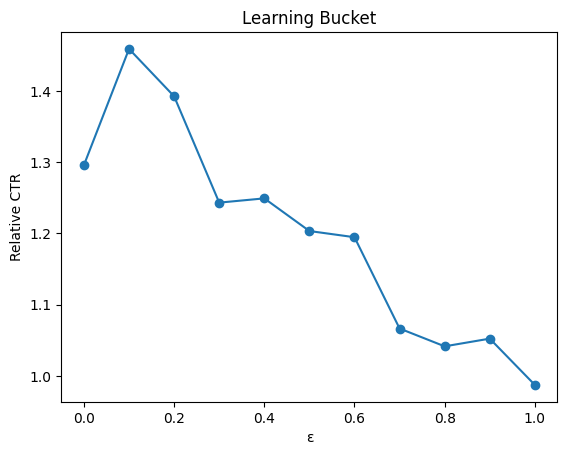

Best parameter in size: {size}% Egreedy Disjoint (ε=0.1), context:user)
	 ===== Size: 100% ===== 

Egreedy Disjoint (ε=0.0), context:user)0.0431    2.2m
Egreedy Disjoint (ε=0.1), context:user)0.0552    2.2m
Egreedy Disjoint (ε=0.2), context:user)0.0588    2.3m
Egreedy Disjoint (ε=0.3), context:user)0.0553    2.3m
Egreedy Disjoint (ε=0.4), context:user)0.0496    2.4m
Egreedy Disjoint (ε=0.5), context:user)0.0516    2.3m
Egreedy Disjoint (ε=0.6), context:user)0.0497    2.4m
Egreedy Disjoint (ε=0.7), context:user)0.0472    2.3m
Egreedy Disjoint (ε=0.8), context:user)0.0453    2.5m
Egreedy Disjoint (ε=0.9), context:user)0.0434    2.4m
Egreedy Disjoint (ε=1.0), context:user)0.0403    2.4m


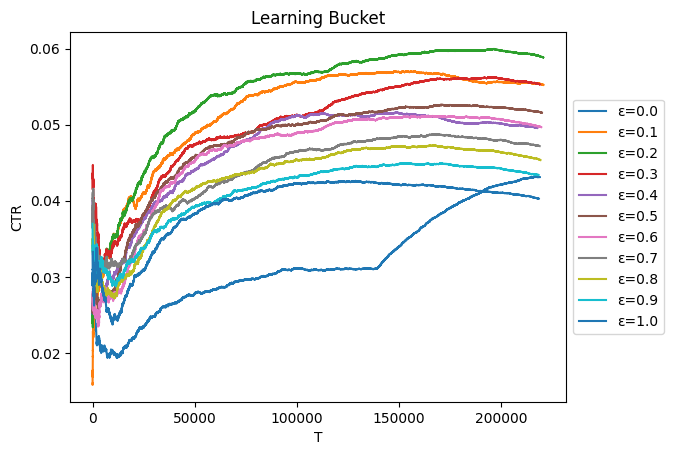

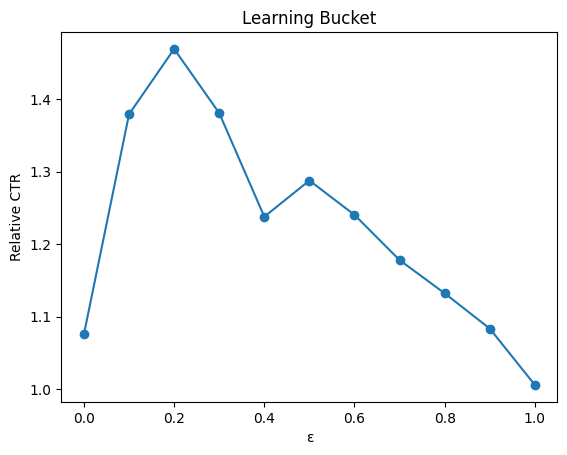

Best parameter in size: {size}% Egreedy Disjoint (ε=0.2), context:user)


In [8]:
sizes = [1, 5, 10, 20, 30, 100]
for i, size in enumerate(sizes):
    tests = [Egreedy_Disjoint(e) for e in epsilon_values]
    plot_results(tests, size=size, index= i)

## Results for E-greedy Hybrid

	 ===== Size: 1% ===== 

Egreedy Hybrid (ε=0.0), context:user)0.063     13.4s
Egreedy Hybrid (ε=0.1), context:user)0.0554    12.6s
Egreedy Hybrid (ε=0.2), context:user)0.0414    12.6s
Egreedy Hybrid (ε=0.3), context:user)0.057     13.5s
Egreedy Hybrid (ε=0.4), context:user)0.0534    11.8s
Egreedy Hybrid (ε=0.5), context:user)0.0528    11.6s
Egreedy Hybrid (ε=0.6), context:user)0.0386    11.4s
Egreedy Hybrid (ε=0.7), context:user)0.0515    11.6s
Egreedy Hybrid (ε=0.8), context:user)0.0447    11.5s
Egreedy Hybrid (ε=0.9), context:user)0.0367    11.5s
Egreedy Hybrid (ε=1.0), context:user)0.0349    11.5s


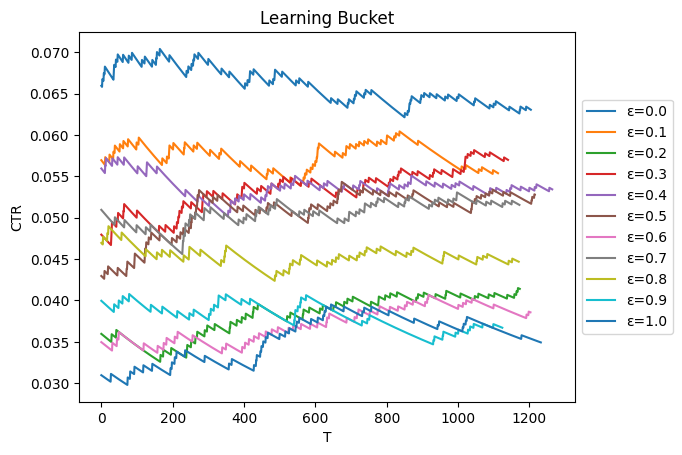

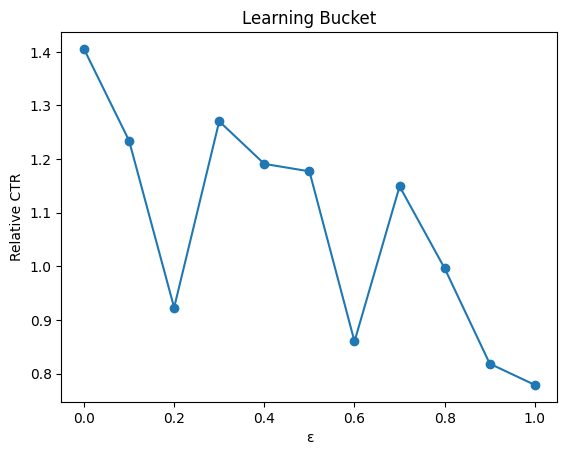

Best parameter in size: 1% Egreedy Hybrid (ε=0.0), context:user)
	 ===== Size: 5% ===== 

Egreedy Hybrid (ε=0.0), context:user)0.0659    58.7s
Egreedy Hybrid (ε=0.1), context:user)0.062     57.3s
Egreedy Hybrid (ε=0.2), context:user)0.0549    56.9s
Egreedy Hybrid (ε=0.3), context:user)0.0465    56.6s
Egreedy Hybrid (ε=0.4), context:user)0.0451    56.7s
Egreedy Hybrid (ε=0.5), context:user)0.0488    56.7s
Egreedy Hybrid (ε=0.6), context:user)0.0458    59.6s
Egreedy Hybrid (ε=0.7), context:user)0.0467    58.2s
Egreedy Hybrid (ε=0.8), context:user)0.0406    57.5s
Egreedy Hybrid (ε=0.9), context:user)0.0466    56.8s
Egreedy Hybrid (ε=1.0), context:user)0.0429    57.7s


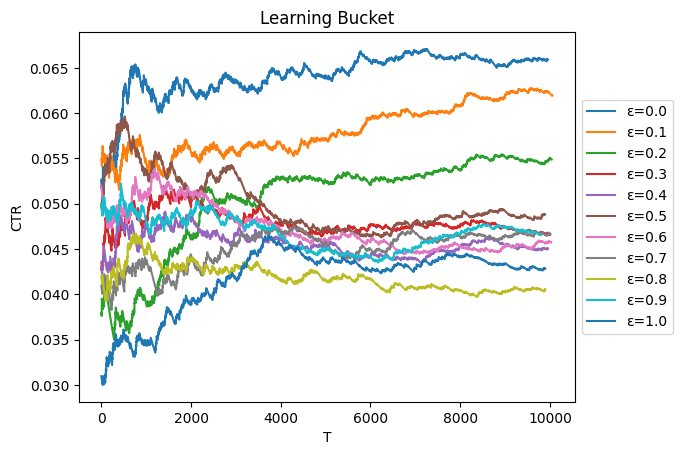

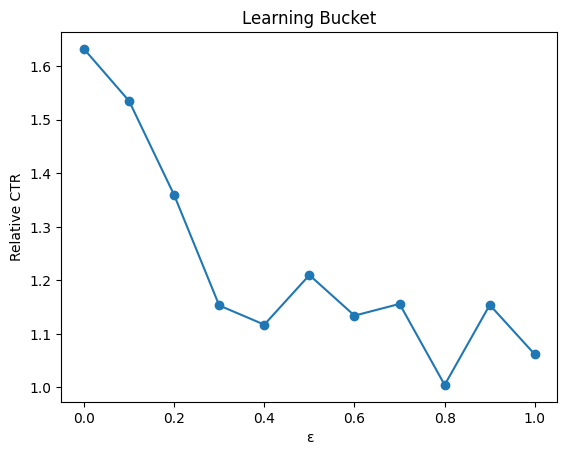

Best parameter in size: 5% Egreedy Hybrid (ε=0.0), context:user)
	 ===== Size: 10% ===== 

Egreedy Hybrid (ε=0.0), context:user)0.0612    2.0m
Egreedy Hybrid (ε=0.1), context:user)0.0574    1.9m
Egreedy Hybrid (ε=0.2), context:user)0.0544    2.1m
Egreedy Hybrid (ε=0.3), context:user)0.0519    1.9m
Egreedy Hybrid (ε=0.4), context:user)0.0528    2.1m
Egreedy Hybrid (ε=0.5), context:user)0.0501    2.0m
Egreedy Hybrid (ε=0.6), context:user)0.0447    2.0m
Egreedy Hybrid (ε=0.7), context:user)0.0456    2.0m
Egreedy Hybrid (ε=0.8), context:user)0.041     2.0m
Egreedy Hybrid (ε=0.9), context:user)0.0412    2.0m
Egreedy Hybrid (ε=1.0), context:user)0.0392    2.0m


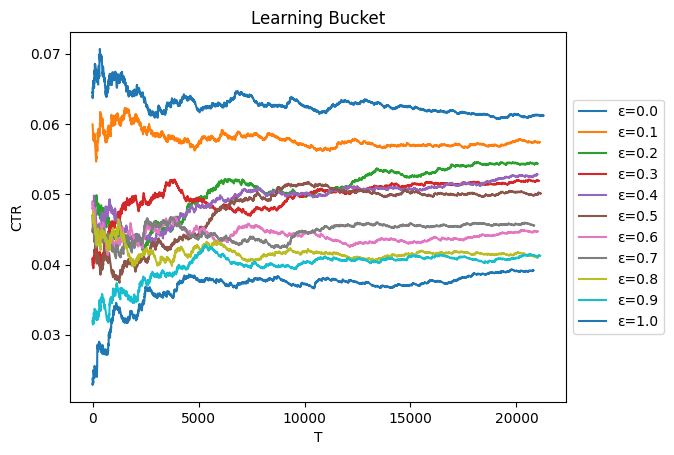

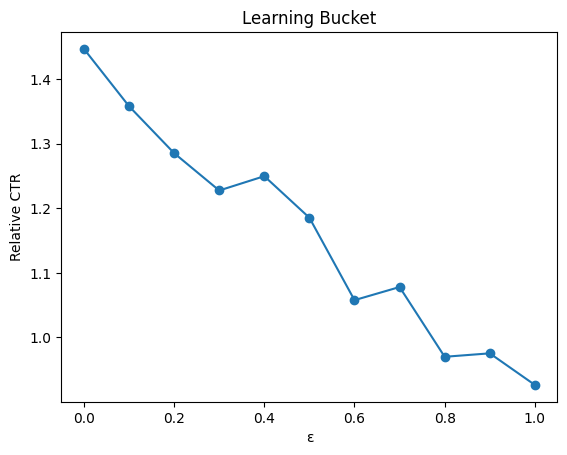

Best parameter in size: 10% Egreedy Hybrid (ε=0.0), context:user)
	 ===== Size: 20% ===== 

Egreedy Hybrid (ε=0.0), context:user)0.0374    3.8m
Egreedy Hybrid (ε=0.1), context:user)0.0599    3.8m
Egreedy Hybrid (ε=0.2), context:user)0.057     3.9m
Egreedy Hybrid (ε=0.3), context:user)0.0543    4.1m
Egreedy Hybrid (ε=0.4), context:user)0.0503    3.8m
Egreedy Hybrid (ε=0.5), context:user)0.0476    3.9m
Egreedy Hybrid (ε=0.6), context:user)0.0447    3.8m
Egreedy Hybrid (ε=0.7), context:user)0.0465    3.8m
Egreedy Hybrid (ε=0.8), context:user)0.0449    4.2m
Egreedy Hybrid (ε=0.9), context:user)0.0418    4.3m
Egreedy Hybrid (ε=1.0), context:user)0.0395    4.2m


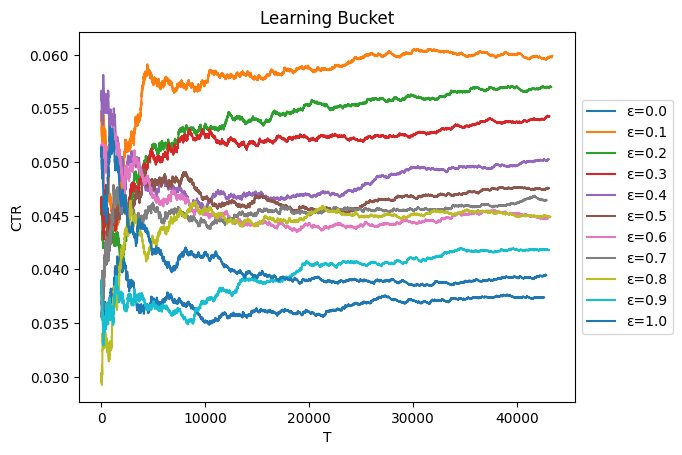

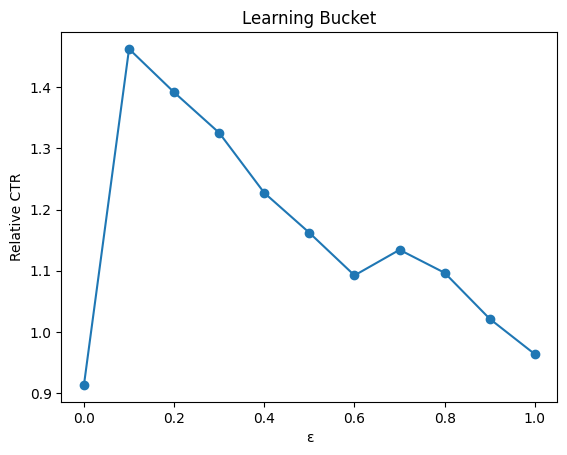

Best parameter in size: 20% Egreedy Hybrid (ε=0.1), context:user)
	 ===== Size: 30% ===== 

Egreedy Hybrid (ε=0.0), context:user)0.0597    6.0m
Egreedy Hybrid (ε=0.1), context:user)0.0599    5.2m
Egreedy Hybrid (ε=0.2), context:user)0.0544    3.9m
Egreedy Hybrid (ε=0.3), context:user)0.057     3.9m
Egreedy Hybrid (ε=0.4), context:user)0.0533    4.0m
Egreedy Hybrid (ε=0.5), context:user)0.0503    4.1m
Egreedy Hybrid (ε=0.6), context:user)0.0483    3.9m
Egreedy Hybrid (ε=0.7), context:user)0.0461    3.9m
Egreedy Hybrid (ε=0.8), context:user)0.0438    4.0m
Egreedy Hybrid (ε=0.9), context:user)0.0428    4.0m
Egreedy Hybrid (ε=1.0), context:user)0.0413    4.1m


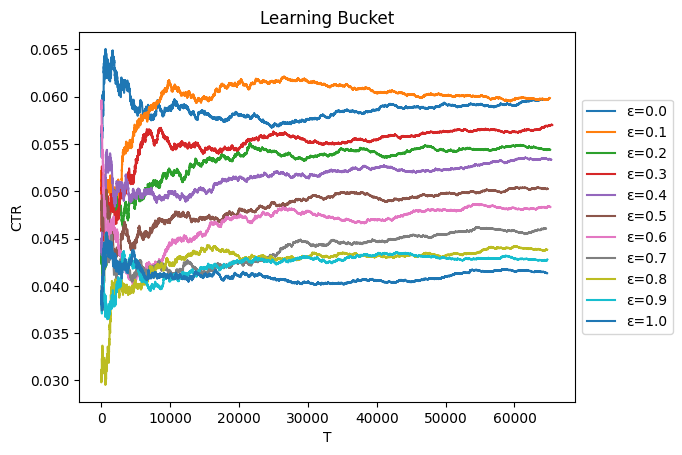

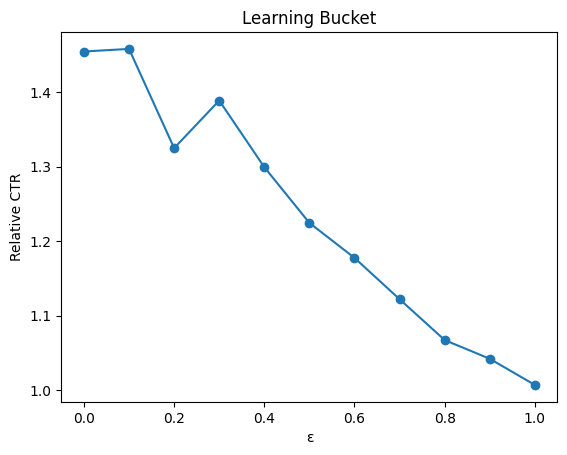

Best parameter in size: 30% Egreedy Hybrid (ε=0.1), context:user)
	 ===== Size: 100% ===== 

Egreedy Hybrid (ε=0.0), context:user)0.0425    13.7m
Egreedy Hybrid (ε=0.1), context:user)0.0601    12.7m
Egreedy Hybrid (ε=0.2), context:user)0.0554    13.7m
Egreedy Hybrid (ε=0.3), context:user)0.0547    13.0m
Egreedy Hybrid (ε=0.4), context:user)0.0526    12.9m
Egreedy Hybrid (ε=0.5), context:user)0.0526    12.8m
Egreedy Hybrid (ε=0.6), context:user)0.0497    12.8m
Egreedy Hybrid (ε=0.7), context:user)0.0467    13.4m
Egreedy Hybrid (ε=0.8), context:user)0.045     13.5m
Egreedy Hybrid (ε=0.9), context:user)0.0433    12.9m
Egreedy Hybrid (ε=1.0), context:user)0.0409    12.7m


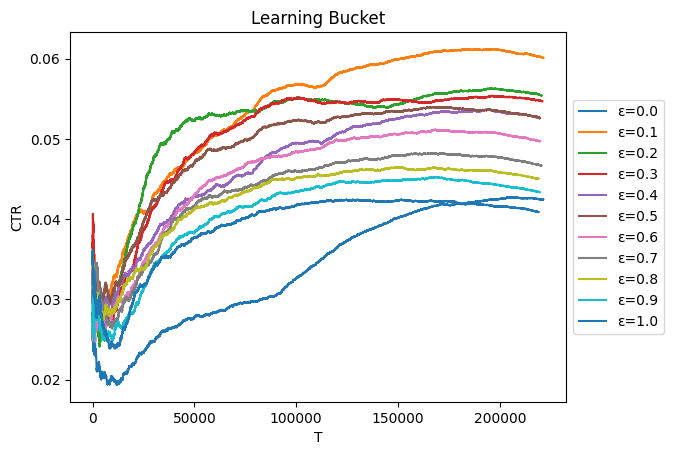

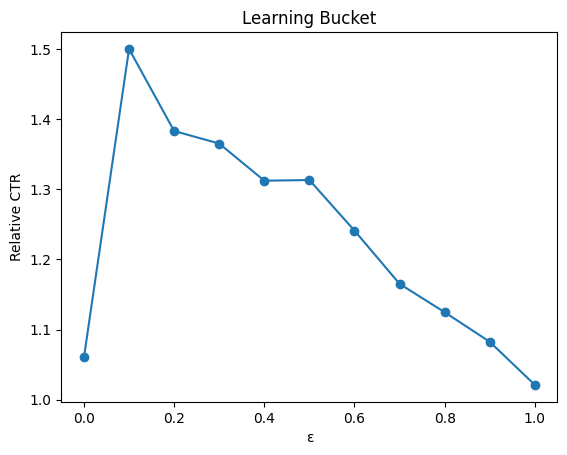

Best parameter in size: 100% Egreedy Hybrid (ε=0.1), context:user)


In [7]:
sizes = [1, 5, 10, 20, 30, 100]
for i, size in enumerate(sizes):
    tests = [Egreedy_Hybrid(e) for e in epsilon_values]
    plot_results(tests, size=size, index= i)

## Results for UCB 


	 ===== Size: 1% ===== 

UCB1 (a=0.0)        0.0529    0.6s
UCB1 (a=0.2)        0.0466    0.5s
UCB1 (a=0.4)        0.0429    0.6s
UCB1 (a=0.6)        0.0439    0.6s
UCB1 (a=0.8)        0.0378    0.5s
UCB1 (a=1.0)        0.0461    0.5s
UCB1 (a=1.2)        0.04      0.5s
UCB1 (a=1.4)        0.0362    0.5s


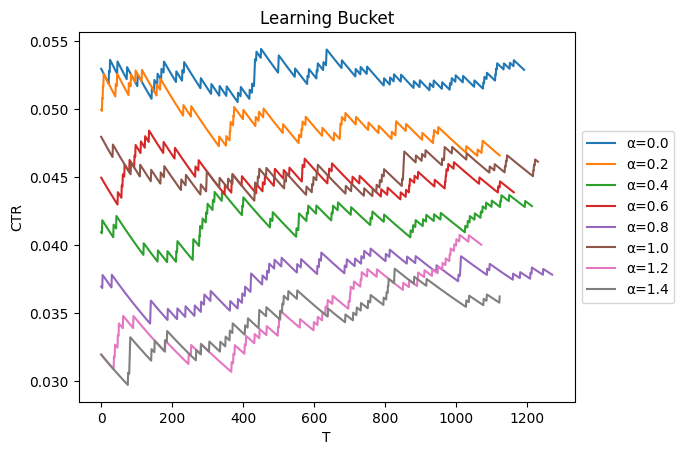

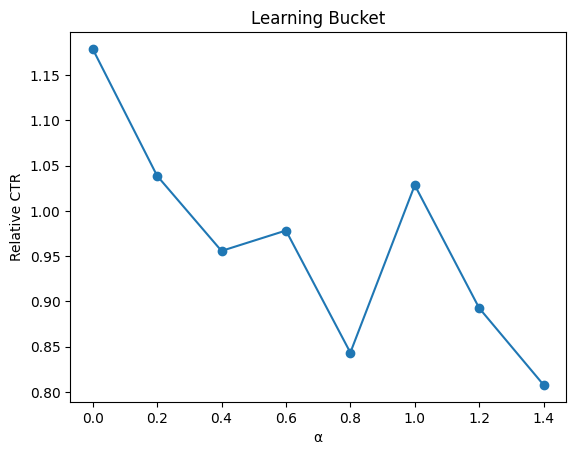

Best parameter in size: 1% UCB1 (a=0.0)
	 ===== Size: 5% ===== 

UCB1 (a=0.0)        0.0515    2.5s
UCB1 (a=0.2)        0.0425    2.4s
UCB1 (a=0.4)        0.0432    2.3s
UCB1 (a=0.6)        0.0414    2.5s
UCB1 (a=0.8)        0.0431    2.5s
UCB1 (a=1.0)        0.0432    2.5s
UCB1 (a=1.2)        0.0405    2.4s
UCB1 (a=1.4)        0.0432    2.3s


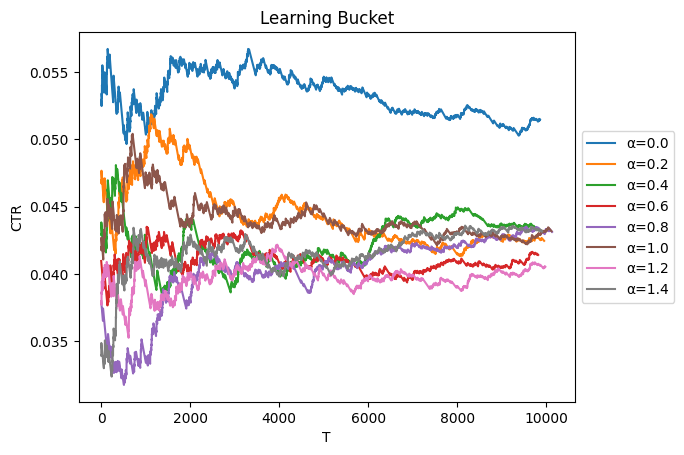

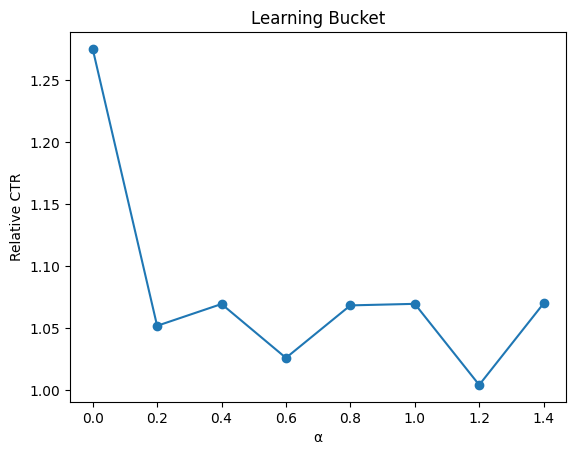

Best parameter in size: 5% UCB1 (a=0.0)
	 ===== Size: 10% ===== 

UCB1 (a=0.0)        0.0478    4.7s
UCB1 (a=0.2)        0.0472    4.6s
UCB1 (a=0.4)        0.0433    4.7s
UCB1 (a=0.6)        0.0428    4.7s
UCB1 (a=0.8)        0.0422    4.6s
UCB1 (a=1.0)        0.0409    4.6s
UCB1 (a=1.2)        0.0428    4.7s
UCB1 (a=1.4)        0.0422    4.6s


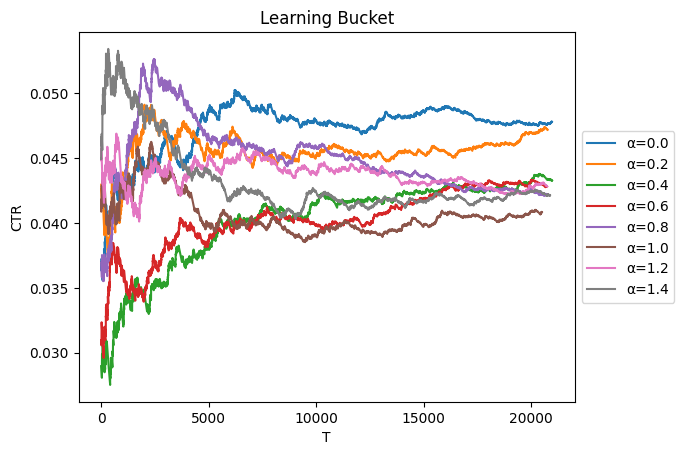

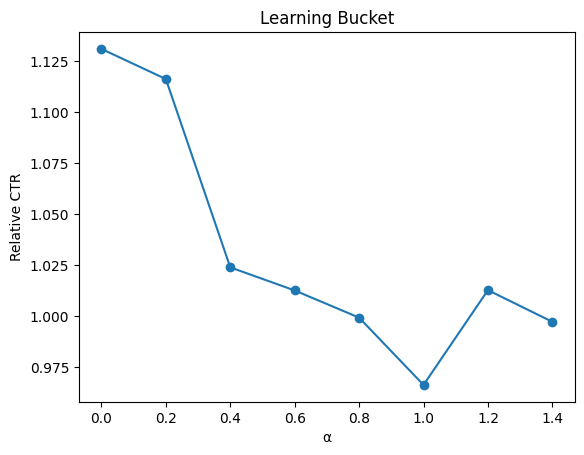

Best parameter in size: 10% UCB1 (a=0.0)
	 ===== Size: 20% ===== 

UCB1 (a=0.0)        0.0524    9.4s
UCB1 (a=0.2)        0.0484    9.3s
UCB1 (a=0.4)        0.0465    9.3s
UCB1 (a=0.6)        0.046     9.4s
UCB1 (a=0.8)        0.0436    9.4s
UCB1 (a=1.0)        0.043     9.4s
UCB1 (a=1.2)        0.0445    9.3s
UCB1 (a=1.4)        0.044     9.4s


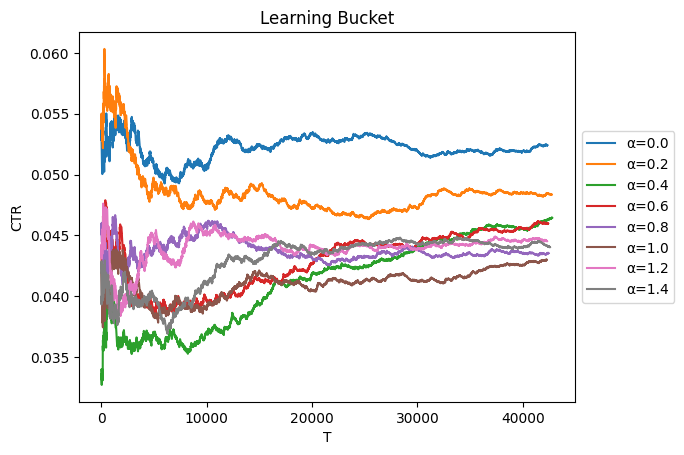

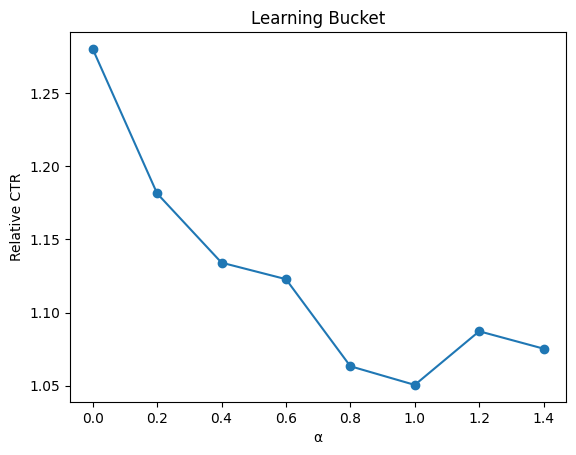

Best parameter in size: 20% UCB1 (a=0.0)
	 ===== Size: 30% ===== 

UCB1 (a=0.0)        0.0494    14.1s
UCB1 (a=0.2)        0.0496    14.2s
UCB1 (a=0.4)        0.046     14.4s
UCB1 (a=0.6)        0.0456    14.4s
UCB1 (a=0.8)        0.0432    14.2s
UCB1 (a=1.0)        0.0442    14.2s
UCB1 (a=1.2)        0.043     14.6s
UCB1 (a=1.4)        0.0434    14.3s


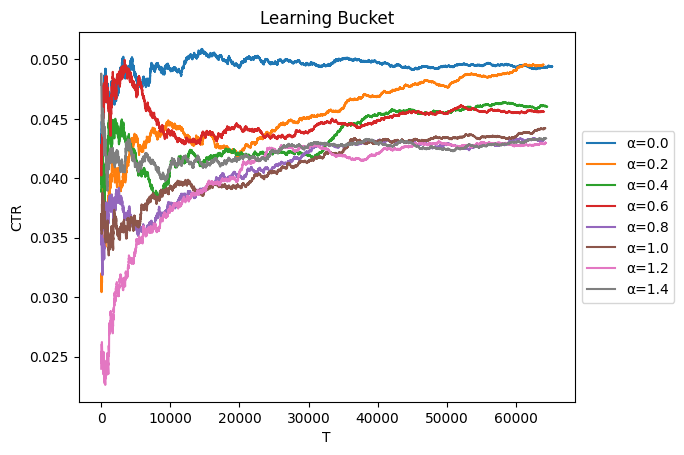

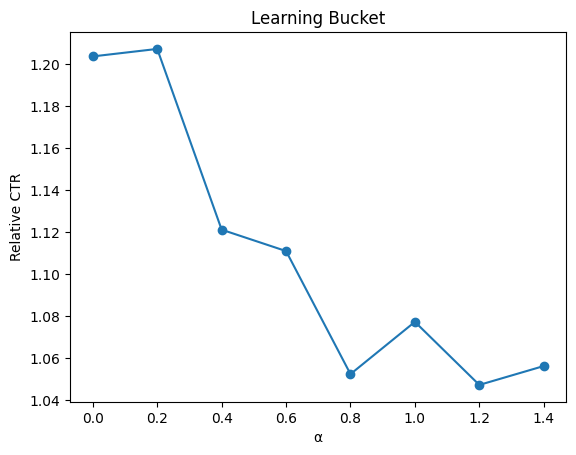

Best parameter in size: 30% UCB1 (a=0.2)
	 ===== Size: 100% ===== 

UCB1 (a=0.0)        0.0431    42.9s
UCB1 (a=0.2)        0.0588    41.8s
UCB1 (a=0.4)        0.0548    41.7s
UCB1 (a=0.6)        0.0524    41.8s
UCB1 (a=0.8)        0.0508    41.7s
UCB1 (a=1.0)        0.0494    41.8s
UCB1 (a=1.2)        0.0482    42.1s
UCB1 (a=1.4)        0.0482    42.0s


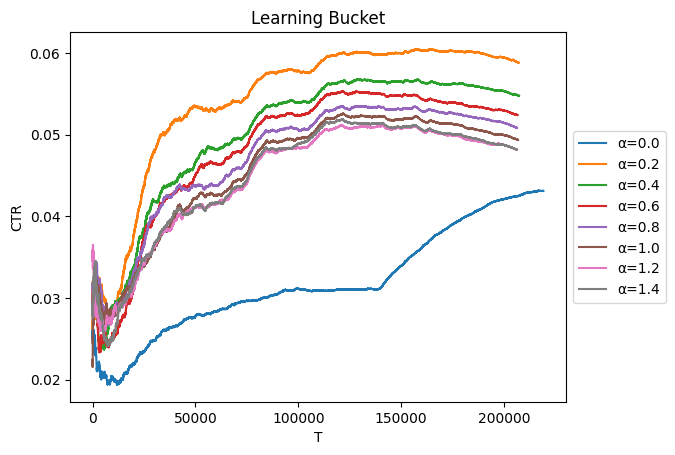

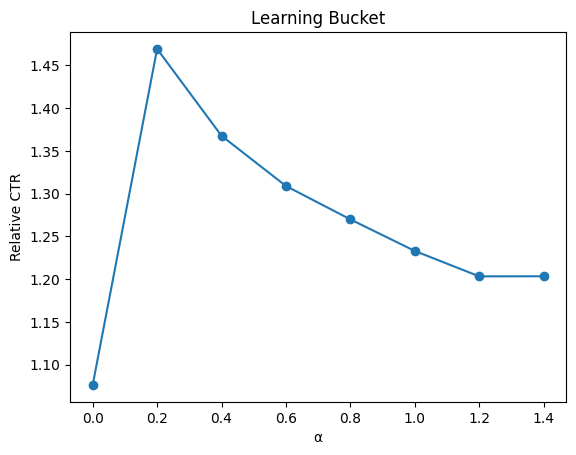

Best parameter in size: 100% UCB1 (a=0.2)


In [12]:
sizes = [1, 5, 10, 20, 30, 100]
for i, size in enumerate(sizes):    
    tests = [Ucb1(a) for a in alpha_values]
    plot_results(tests, size= size, index= i)

## Results for LinUCB Disjoint (context = user)

	 ===== Size: 1% ===== 

LinUCB Disjoint (α=0.0, context:user)0.0497    6.7s
LinUCB Disjoint (α=0.2, context:user)0.0414    4.1s
LinUCB Disjoint (α=0.4, context:user)0.0395    3.9s
LinUCB Disjoint (α=0.6, context:user)0.0479    3.6s
LinUCB Disjoint (α=0.8, context:user)0.0513    3.4s
LinUCB Disjoint (α=1.0, context:user)0.0427    3.4s
LinUCB Disjoint (α=1.2, context:user)0.0487    3.3s
LinUCB Disjoint (α=1.4, context:user)0.038     3.1s


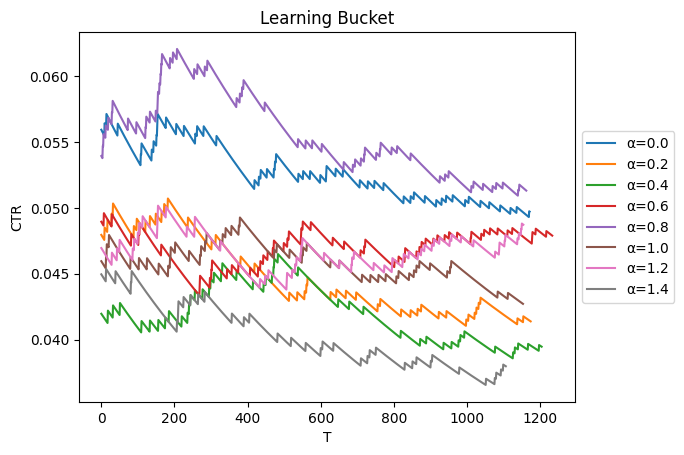

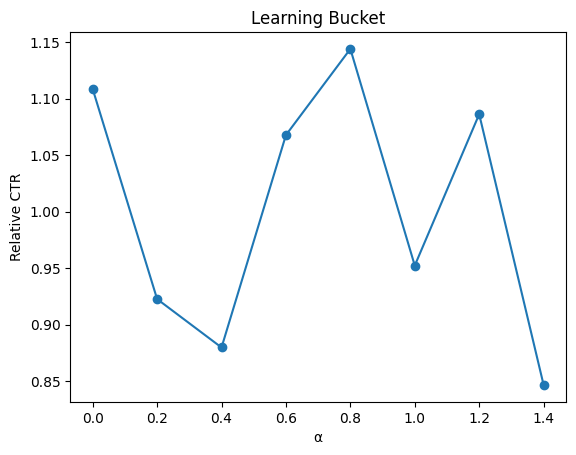

Best parameter in size: 1% LinUCB Disjoint (α=0.8, context:user)
	 ===== Size: 5% ===== 

LinUCB Disjoint (α=0.0, context:user)0.049     14.8s
LinUCB Disjoint (α=0.2, context:user)0.0514    14.0s
LinUCB Disjoint (α=0.4, context:user)0.0515    13.5s
LinUCB Disjoint (α=0.6, context:user)0.0495    13.4s
LinUCB Disjoint (α=0.8, context:user)0.046     13.4s
LinUCB Disjoint (α=1.0, context:user)0.0462    13.6s
LinUCB Disjoint (α=1.2, context:user)0.0462    13.1s
LinUCB Disjoint (α=1.4, context:user)0.048     13.7s


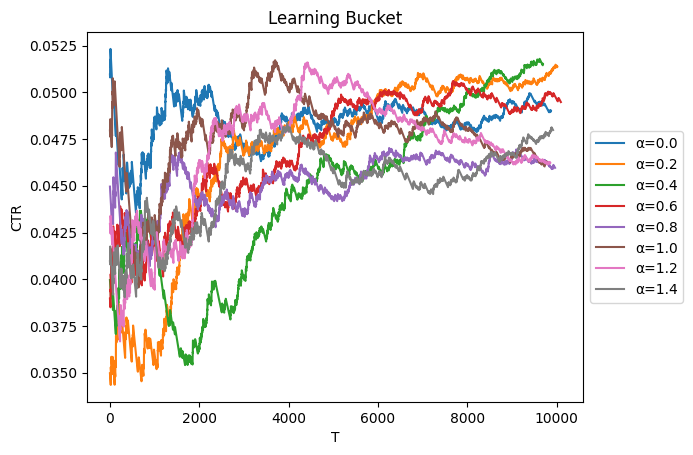

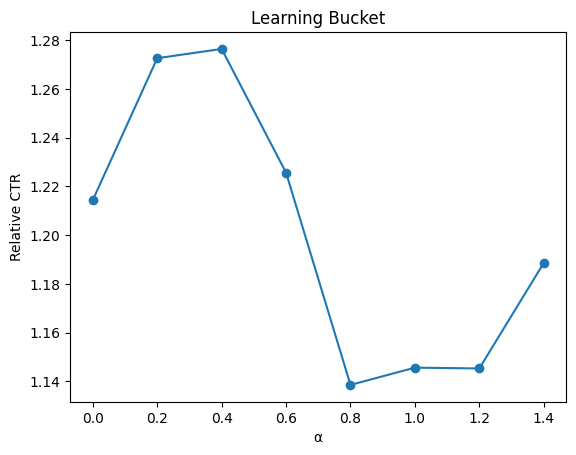

Best parameter in size: 5% LinUCB Disjoint (α=0.4, context:user)
	 ===== Size: 10% ===== 

LinUCB Disjoint (α=0.0, context:user)0.0511    28.0s
LinUCB Disjoint (α=0.2, context:user)0.0545    27.5s
LinUCB Disjoint (α=0.4, context:user)0.0491    26.5s
LinUCB Disjoint (α=0.6, context:user)0.0486    25.6s
LinUCB Disjoint (α=0.8, context:user)0.0463    25.4s
LinUCB Disjoint (α=1.0, context:user)0.0469    25.3s
LinUCB Disjoint (α=1.2, context:user)0.0449    25.5s
LinUCB Disjoint (α=1.4, context:user)0.043     26.7s


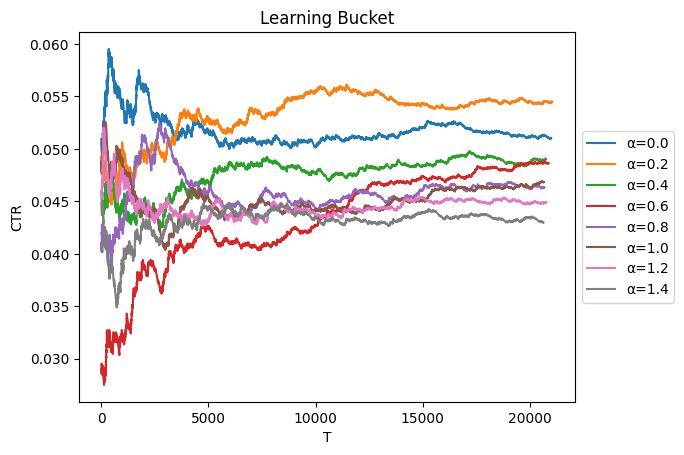

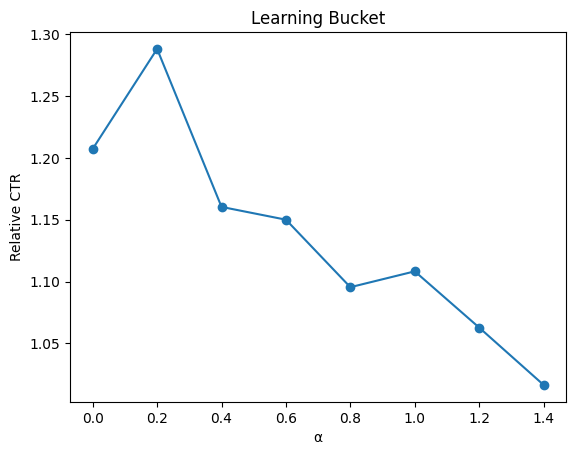

Best parameter in size: 10% LinUCB Disjoint (α=0.2, context:user)
	 ===== Size: 20% ===== 

LinUCB Disjoint (α=0.0, context:user)0.0545    53.0s
LinUCB Disjoint (α=0.2, context:user)0.0594    53.4s
LinUCB Disjoint (α=0.4, context:user)0.0591    51.4s
LinUCB Disjoint (α=0.6, context:user)0.0557    51.0s
LinUCB Disjoint (α=0.8, context:user)0.0472    51.1s
LinUCB Disjoint (α=1.0, context:user)0.0494    48.8s
LinUCB Disjoint (α=1.2, context:user)0.0455    35.8s
LinUCB Disjoint (α=1.4, context:user)0.0482    36.4s


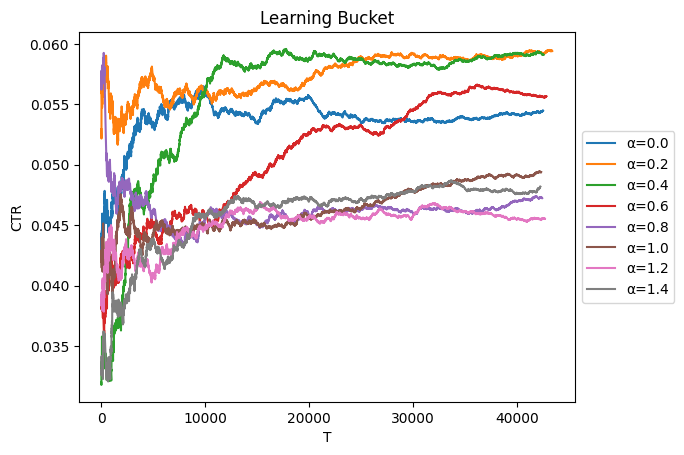

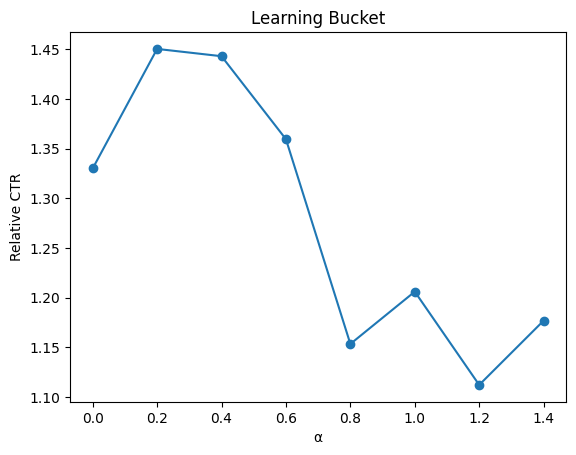

Best parameter in size: 20% LinUCB Disjoint (α=0.2, context:user)
	 ===== Size: 30% ===== 

LinUCB Disjoint (α=0.0, context:user)0.0515    53.6s
LinUCB Disjoint (α=0.2, context:user)0.0605    52.8s
LinUCB Disjoint (α=0.4, context:user)0.0588    53.3s
LinUCB Disjoint (α=0.6, context:user)0.0558    53.4s
LinUCB Disjoint (α=0.8, context:user)0.0514    57.6s
LinUCB Disjoint (α=1.0, context:user)0.048     1.0m
LinUCB Disjoint (α=1.2, context:user)0.0479    1.0m
LinUCB Disjoint (α=1.4, context:user)0.0472    59.5s


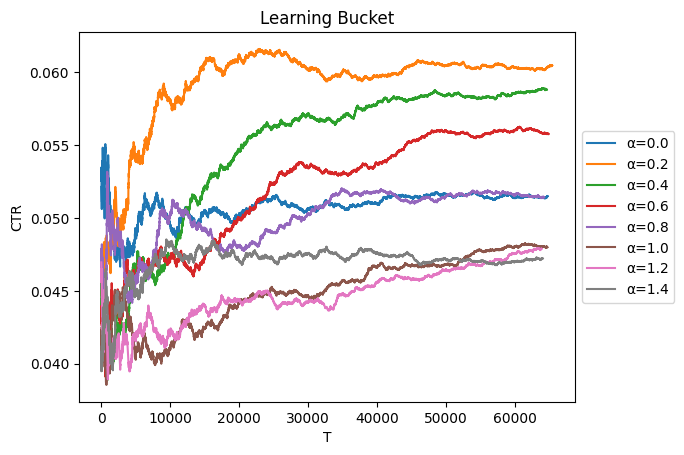

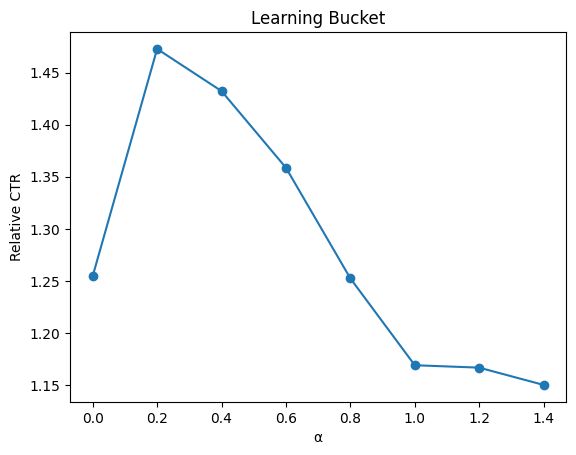

Best parameter in size: 30% LinUCB Disjoint (α=0.2, context:user)
	 ===== Size: 100% ===== 

LinUCB Disjoint (α=0.0, context:user)0.0431    3.3m
LinUCB Disjoint (α=0.2, context:user)0.0616    3.2m
LinUCB Disjoint (α=0.4, context:user)0.061     3.2m
LinUCB Disjoint (α=0.6, context:user)0.0601    3.1m
LinUCB Disjoint (α=0.8, context:user)0.0583    3.1m
LinUCB Disjoint (α=1.0, context:user)0.0573    3.1m
LinUCB Disjoint (α=1.2, context:user)0.0546    3.1m
LinUCB Disjoint (α=1.4, context:user)0.0531    3.1m


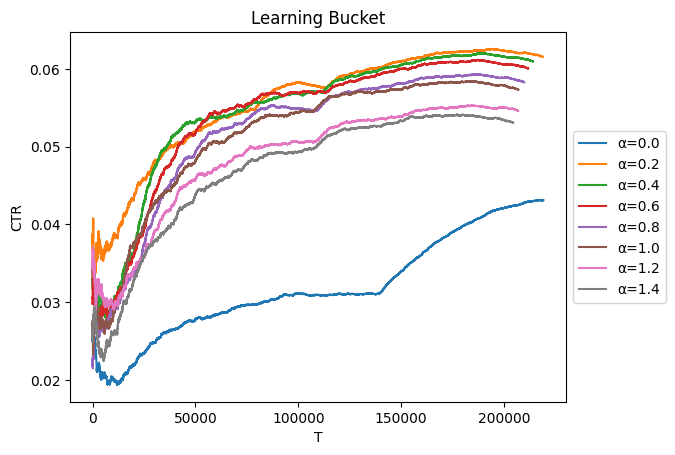

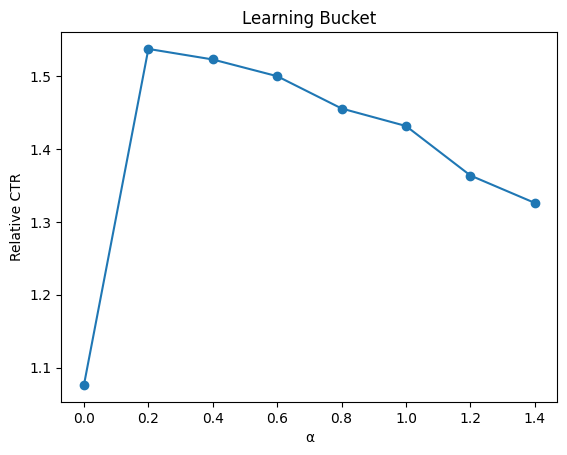

Best parameter in size: 100% LinUCB Disjoint (α=0.2, context:user)


In [12]:
sizes = [1, 5, 10, 20, 30, 100]
for i, size in enumerate(sizes):
    tests = [LinUCB(a, context = "user") for a in alpha_values]
    plot_results(tests, size= size, index= i)

## Results for LinUCB Hybrid (context = user)

	 ===== Size: 1% ===== 

LinUCB Hybrid (α=0.0, context:user)0.0489    10.4s
LinUCB Hybrid (α=0.2, context:user)0.0488    10.6s
LinUCB Hybrid (α=0.4, context:user)0.0522    10.5s
LinUCB Hybrid (α=0.6, context:user)0.0508    10.2s
LinUCB Hybrid (α=0.8, context:user)0.0406    10.3s
LinUCB Hybrid (α=1.0, context:user)0.0485    10.3s
LinUCB Hybrid (α=1.2, context:user)0.0396    10.5s
LinUCB Hybrid (α=1.4, context:user)0.0442    10.4s


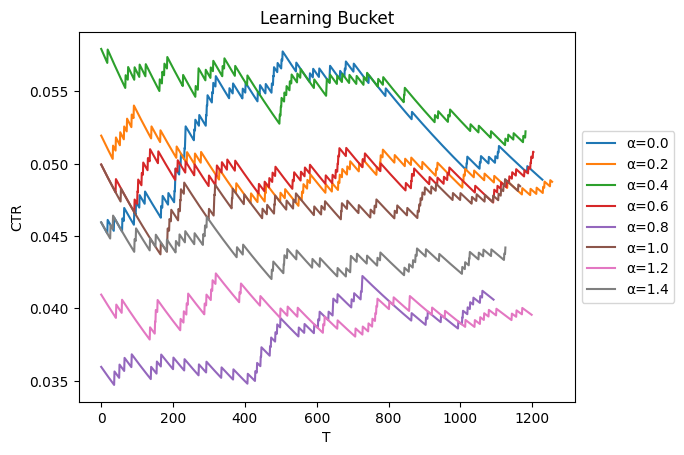

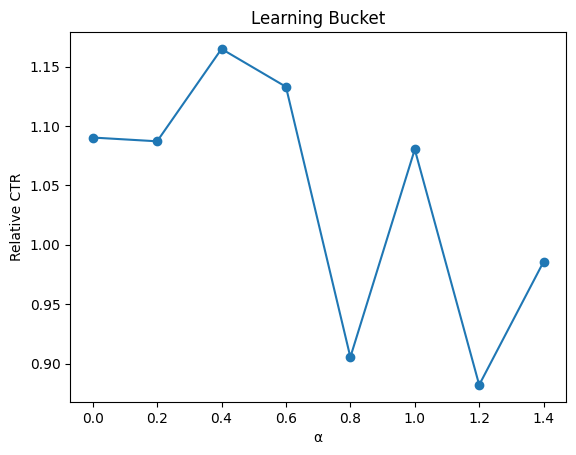

Best parameter in size: 1% LinUCB Hybrid (α=0.4, context:user)
	 ===== Size: 5% ===== 

LinUCB Hybrid (α=0.0, context:user)0.0293    51.6s
LinUCB Hybrid (α=0.2, context:user)0.0444    51.4s
LinUCB Hybrid (α=0.4, context:user)0.0485    52.0s
LinUCB Hybrid (α=0.6, context:user)0.0463    56.0s
LinUCB Hybrid (α=0.8, context:user)0.0471    54.5s
LinUCB Hybrid (α=1.0, context:user)0.041     54.5s
LinUCB Hybrid (α=1.2, context:user)0.0413    55.1s
LinUCB Hybrid (α=1.4, context:user)0.0475    54.4s


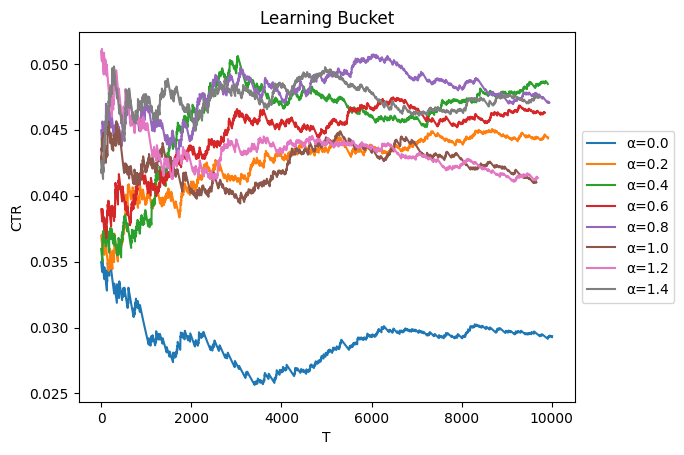

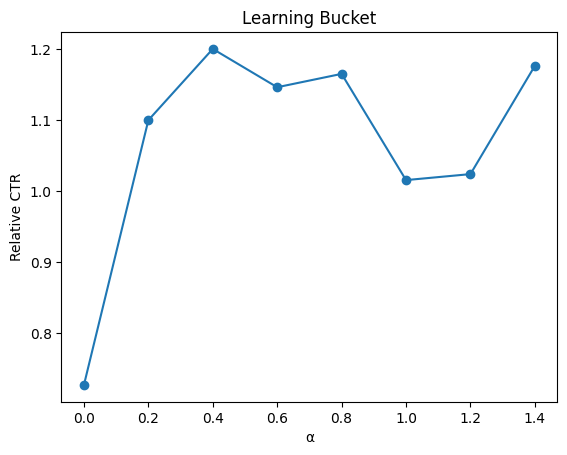

Best parameter in size: 5% LinUCB Hybrid (α=0.4, context:user)
	 ===== Size: 10% ===== 

LinUCB Hybrid (α=0.0, context:user)0.0596    1.8m
LinUCB Hybrid (α=0.2, context:user)0.0607    1.9m
LinUCB Hybrid (α=0.4, context:user)0.0518    1.9m
LinUCB Hybrid (α=0.6, context:user)0.0485    1.8m
LinUCB Hybrid (α=0.8, context:user)0.0474    1.8m
LinUCB Hybrid (α=1.0, context:user)0.0444    1.7m
LinUCB Hybrid (α=1.2, context:user)0.0475    1.7m
LinUCB Hybrid (α=1.4, context:user)0.0451    1.7m


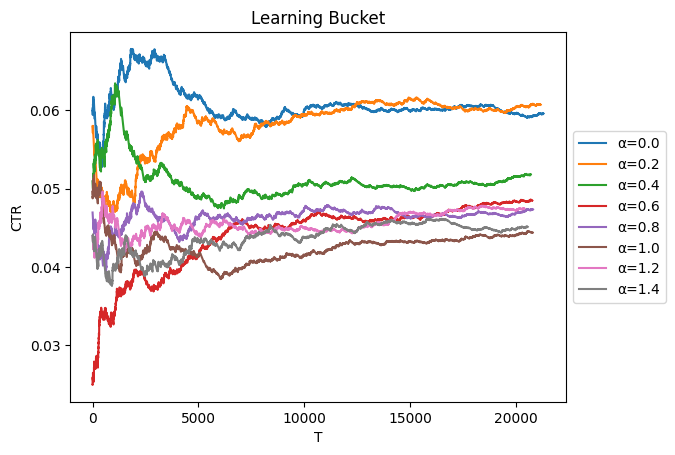

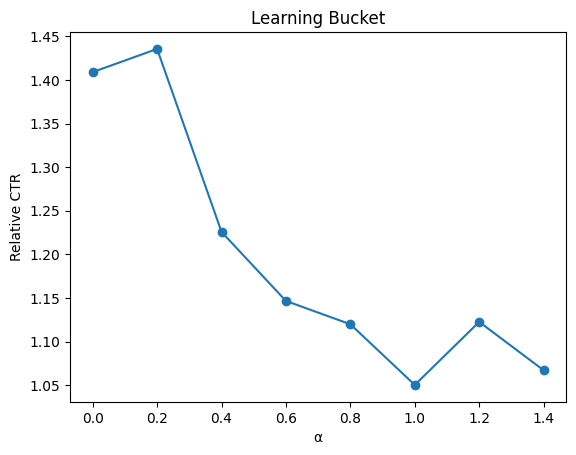

Best parameter in size: 10% LinUCB Hybrid (α=0.2, context:user)
	 ===== Size: 20% ===== 

LinUCB Hybrid (α=0.0, context:user)0.0602    3.5m
LinUCB Hybrid (α=0.2, context:user)0.0619    3.5m
LinUCB Hybrid (α=0.4, context:user)0.0555    3.5m
LinUCB Hybrid (α=0.6, context:user)0.0531    3.5m
LinUCB Hybrid (α=0.8, context:user)0.0511    3.7m
LinUCB Hybrid (α=1.0, context:user)0.0492    3.6m
LinUCB Hybrid (α=1.2, context:user)0.047     3.4m
LinUCB Hybrid (α=1.4, context:user)0.0455    3.4m


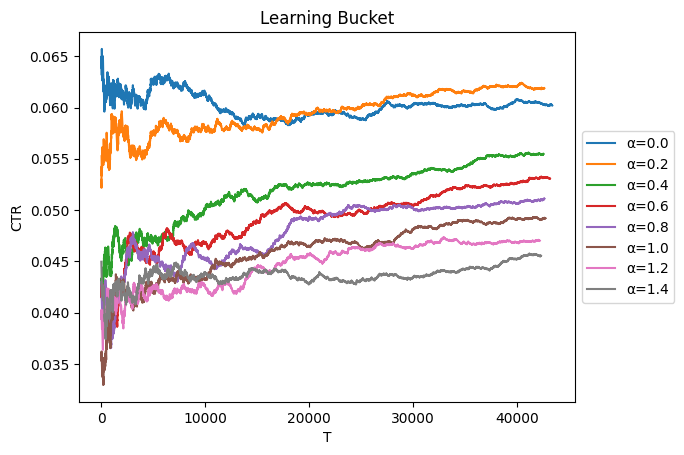

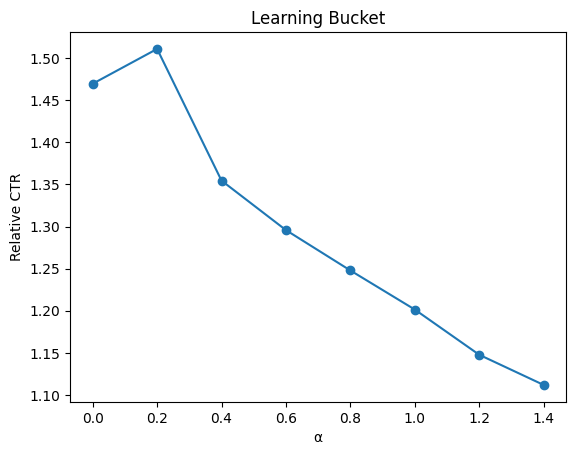

Best parameter in size: 20% LinUCB Hybrid (α=0.2, context:user)
	 ===== Size: 30% ===== 

LinUCB Hybrid (α=0.0, context:user)0.0581    5.2m
LinUCB Hybrid (α=0.2, context:user)0.0567    5.2m
LinUCB Hybrid (α=0.4, context:user)0.0583    5.2m
LinUCB Hybrid (α=0.6, context:user)0.0562    5.2m
LinUCB Hybrid (α=0.8, context:user)0.0528    5.4m
LinUCB Hybrid (α=1.0, context:user)0.047     5.2m
LinUCB Hybrid (α=1.2, context:user)0.047     5.2m
LinUCB Hybrid (α=1.4, context:user)0.0477    5.3m


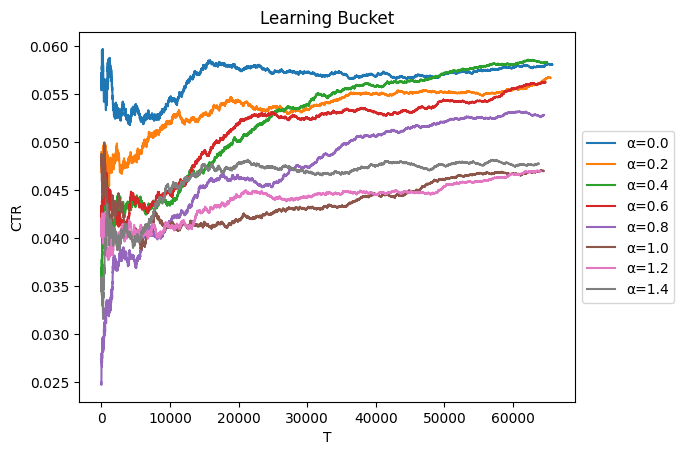

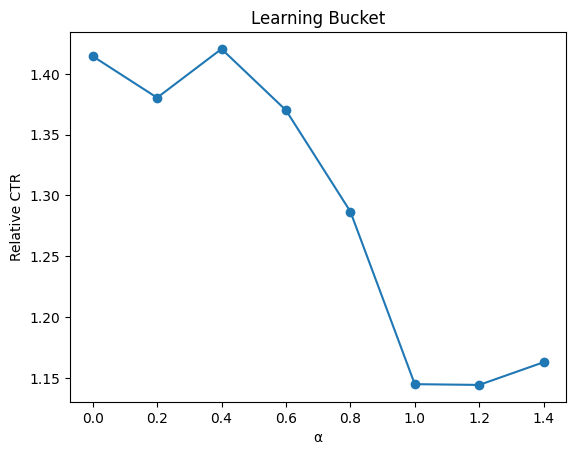

Best parameter in size: 30% LinUCB Hybrid (α=0.4, context:user)
	 ===== Size: 100% ===== 

LinUCB Hybrid (α=0.0, context:user)0.0425    18.0m
LinUCB Hybrid (α=0.2, context:user)0.0586    17.6m
LinUCB Hybrid (α=0.4, context:user)0.0615    17.3m
LinUCB Hybrid (α=0.6, context:user)0.0598    17.4m
LinUCB Hybrid (α=0.8, context:user)0.0582    17.4m
LinUCB Hybrid (α=1.0, context:user)0.0559    17.4m
LinUCB Hybrid (α=1.2, context:user)0.0546    17.7m
LinUCB Hybrid (α=1.4, context:user)0.053     17.3m


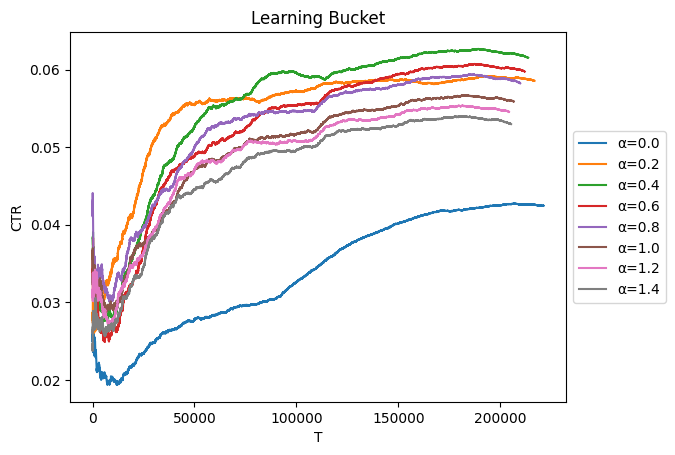

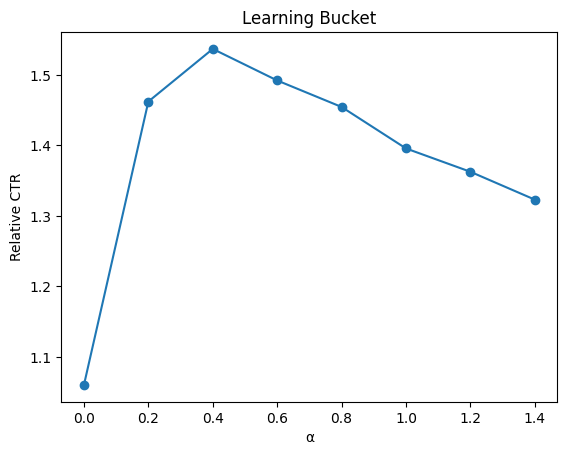

Best parameter in size: 100% LinUCB Hybrid (α=0.4, context:user)


In [8]:
sizes = [1, 5, 10, 20, 30, 100]
for i, size in enumerate(sizes):
    tests = [LinUCB_Hybrid(a, context= "user") for a in alpha_values]
    plot_results(tests, size= size, index= i)